In [346]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [347]:
train = pd.read_csv('../data/titanic_train.csv')

In [348]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


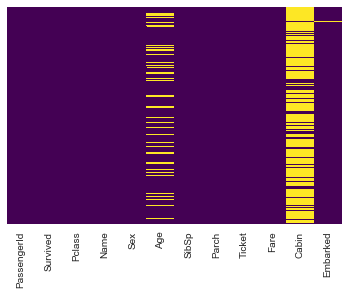

In [349]:
sns.heatmap(train.isnull(),yticklabels=False, cbar= False, cmap='viridis')
sns.set_style('whitegrid')

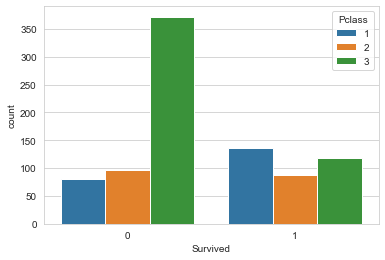

In [350]:
sns.countplot(x='Survived',hue='Pclass', data=train)

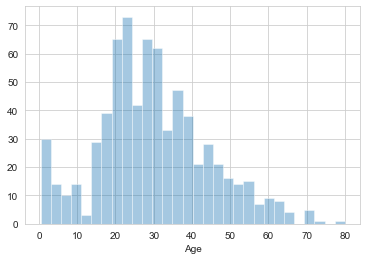

In [351]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

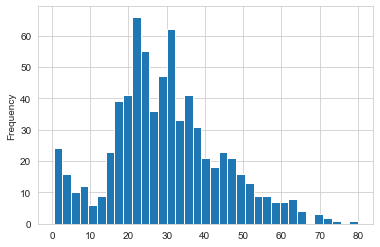

In [352]:
train['Age'].plot.hist(bins=35)

In [353]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


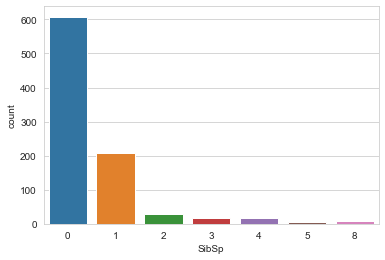

In [354]:
sns.countplot(x='SibSp', data=train)

In [355]:
#train['Fare'].hist(bins=40, figsize=(10,4))

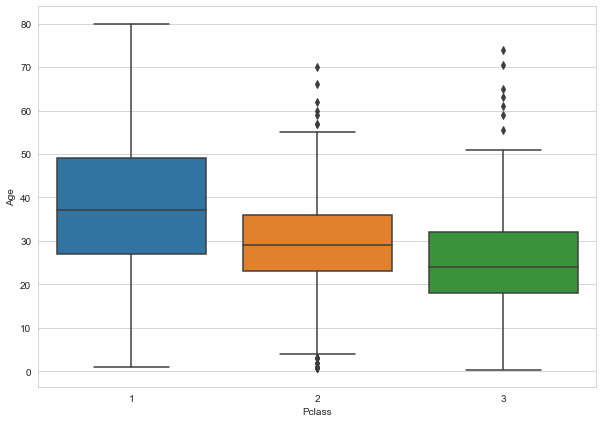

In [356]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [357]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        if Pclass == 2:
            return 29
        else:
            return 24


In [358]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

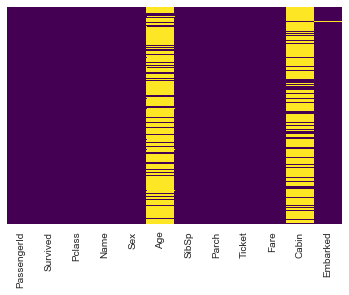

In [359]:
sns.heatmap(train.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [360]:
train.drop('Cabin', axis=1,inplace=True)

In [361]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,NaN,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,NaN,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,NaN,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,NaN,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,NaN,0,0,373450,8.0500,S


In [362]:
train.dropna(inplace=True)

In [363]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)
train = pd.concat([train,sex,embark],axis=1)
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,Q,1,1,0
17,18,1,2,"Williams, Mr. Charles Eugene",male,29.0,0,0,244373,13.0000,S,1,0,1


In [364]:
train.drop(['Sex','Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
train.head()
train.drop('PassengerId', axis=1, inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
5,0,3,24.0,0,0,8.4583,1,1,0
17,1,2,29.0,0,0,13.0000,1,0,1
19,1,3,24.0,0,0,7.2250,0,0,0
26,0,3,24.0,0,0,7.2250,1,0,0
28,1,3,24.0,0,0,7.8792,0,1,0


In [366]:
X = train.drop('Survived', axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

logModel = LogisticRegression()

logModel.fit(X_train, y_train)

predictions = logModel.predict(X_test)

print(classification_report(y_test, predictions))

confusion_matrix(y_test, predictions)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        41
           1       0.80      0.62      0.70        13

    accuracy                           0.87        54
   macro avg       0.84      0.78      0.81        54
weighted avg       0.87      0.87      0.86        54



C:\Users\Philipp\Anaconda3\envs\example_logistic_regression\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[39,  2],
       [ 5,  8]], dtype=int64)